In [2]:
import pandas as pd
import seaborn as sns
import math
import numpy as np

%matplotlib inline

from scipy.stats.stats import pearsonr
from scipy import spatial

from IPython.display import Image

# loading data

In [26]:
dm = pd.read_csv('ml-latest-small/movies.csv')
print('Number of movies: ', dm.shape[0])
dm

Number of movies:  9125


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [27]:
dr = pd.read_csv('ml-latest-small/ratings.csv')
print('Number of ratings: ', dr.shape[0])
print('Number of users: ', len(dr['userId'].unique()))
print('Number of movies reviewed: ', len(dr['movieId'].unique()))
dr

Number of ratings:  100004
Number of users:  671
Number of movies reviewed:  9066


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


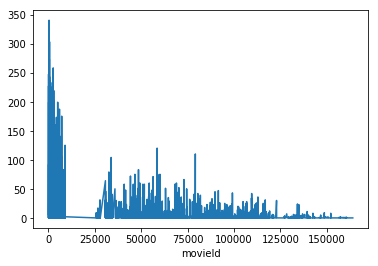

In [28]:
dr.groupby('movieId').count()['userId'].plot()

# data wrangling

In [29]:
# transform the genres column for easier manipulation
dm['genres'] = dm['genres'].apply(lambda x: x.split('|'))
dm.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


## Transform Genres column to a list of columns

In [7]:
# generate flat list from 'genres' column
genres_flat_list = list(set([item for sublist in dm['genres'] for item in sublist]))
print('genres, list elements: ', len(genres_flat_list))
print(genres_flat_list)

genres, list elements:  20
['Comedy', 'Drama', 'Fantasy', 'Action', 'Thriller', 'Horror', 'Western', 'Film-Noir', '(no genres listed)', 'Animation', 'Crime', 'Mystery', 'War', 'Children', 'Romance', 'Sci-Fi', 'Musical', 'Documentary', 'Adventure', 'IMAX']


In [8]:
# generate separate columns for each of the genre values
for item in genres_flat_list:
    dm['' + str(item)] = 0

In [9]:
%%time
# populate correspodning new columns based on the value in the 'genres' column
# e.g. [Action, Drama] -> put 1 in 'Action' and 'Drama' column
for index, row in dm.iterrows():
#     print row['c1'], row['c2']
    if row['genres'] == '(no genres listed)':
        continue
    
    for item in dm.loc[index,'genres']:
        dm.loc[index,item] = 1

CPU times: user 10.6 s, sys: 52.2 ms, total: 10.7 s
Wall time: 10.6 s


In [10]:
dm.drop(axis=1,columns=['genres'],inplace=True)

In [11]:
dm

,movieId,title,Comedy,Drama,Fantasy,Action,Thriller,Horror,Western,Film-Noir,...,Crime,Mystery,War,Children,Romance,Sci-Fi,Musical,Documentary,Adventure,IMAX
0,1,Toy Story (1995),1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2,Jumanji (1995),0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,Grumpier Old Men (1995),1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,Father of the Bride Part II (1995),1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,7,Sabrina (1995),1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,8,Tom and Huck (1995),0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,9,Sudden Death (1995),0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# content based

- New user is registered into the system
- The user makes a selection of categories of interest
- Offer best rated items from the chosen categories
- Later, categories can be derived from the user’s behavior
- We can use all sorts of item’s additional metadata to make the recommendation list (if it’s available, e.g actors)

## adjusted ratings

In [12]:
Image(url='https://image.ibb.co/jYWZp9/wr.png')

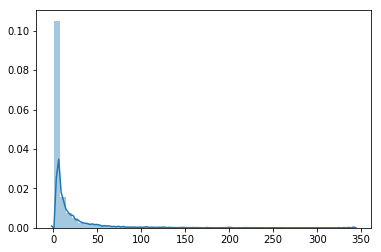

In [13]:
sns.distplot(dr.groupby('movieId').size())

In [14]:
# minimum number of reviews for movie to be considered for rating
# 'm' can be set to a hard predefined threshold or to be calculated from the dataset

MIN_REVIEW = 5

m = MIN_REVIEW # hard threshold
# m = dr.groupby('movieId').size().quantile(0.8) # derived from dataset
print('minimum votes:', m)

# average rating of the whole dataset (mean rating of all movies)
C = dr['rating'].mean()
print('global average rating:', C)

minimum votes: 5
global average rating: 3.543608255669773


In [15]:
len(dr[dr['movieId'] == 1])

247

In [16]:
dr[dr['movieId'] == 1]['rating'].mean()

3.8724696356275303

In [17]:
def weighted_rating(x, m=m, C=C):
    v = len(dr[dr['movieId'] == x])
    R = dr[dr['movieId'] == x]['rating'].mean()
    
    return (v/(v+m) * R) + (m/(m+v) * C)

In [18]:
user_cats = ['Action','Drama','Thriller'] # new user categories of interest

In [19]:
dmr = dm.copy()

In [56]:
# choose only movies with that are in at least one of the categories (but it can be in all)
dmr = dmr[dmr[user_cats].sum(axis=1) == len(user_cats)]
dmr = dmr[['movieId','title'] + user_cats]

In [57]:
# calculate average rating and number of ratings for each of the movies
dmr['rating'] = dmr['movieId'].apply(lambda x: weighted_rating(x))
dmr['count'] = dmr['movieId'].apply(lambda x: dr[dr['movieId'] == x]['rating'].count())

In [60]:
# filter and sort movie list
dmr[dmr['count'] > MIN_REVIEW].sort_values('rating', ascending=False).head(5)

,movieId,title,Action,Drama,Thriller,rating,count
4432,6016,City of God (Cidade de Deus) (2002),1,1,1,4.246190,69
2374,2959,Fight Club (1999),1,1,1,4.162889,202
1018,1264,Diva (1981),1,1,1,4.090423,14
263,293,Léon: The Professional (a.k.a. The Professiona...,1,1,1,4.052686,132
7253,69481,"Hurt Locker, The (2008)",1,1,1,4.039292,26


## additional ideas
Just to name a few: using movie meta data, actors, directors, synopsys etc.


# CF - Collaborative Filtering

## Neighborhood methods (user-based / item-based)

In [37]:
# user id for whom we're providing recommendation
USER_ID = 19

In [38]:
rating_matrix = pd.DataFrame(index=dr['userId'].unique(), columns = dr['movieId'].unique())

In [39]:
# initialize with zero

# cleanest way
rating_matrix[:] = 0

# faster, more efficient way
# for col in cf.columns:
#     cf[col].values[:] = 0

In [40]:
rating_matrix

,31,1029,1061,1129,1172,1263,1287,1293,1339,1343,...,134528,134783,137595,138204,60832,64997,72380,129,4736,6425
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# %%time

# populate the ratings matrix, we can skip this part and load the data directly from file

# for item in dr.itertuples():
#     cf_matrix.loc[item[1],item[2]] = item[3]
# cf.to_csv('rating_matrix.csv')

In [42]:
# populate data from file
rating_matrix = pd.read_csv('cf_matrix.csv',index_col=0)

In [63]:
rating_matrix.head(10)

,31,1029,1061,1129,1172,1263,1287,1293,1339,1343,...,134528,134783,137595,138204,60832,64997,72380,129,4736,6425
1,2.5,3.0,3.0,2.0,4.0,2.0,2.0,2.0,3.5,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# calculate similarities between all users and selected user
# here we've used cosine similarity, but that's open for debate of the particular problem

sim = []
for i in range(len(rating_matrix)):
    sim.append(1 - spatial.distance.cosine(rating_matrix.iloc[USER_ID-1,:], rating_matrix.iloc[i,:]))

In [67]:
# put similarities into a dataframe for easier manipulation later on

df_sim = pd.Series(sim,index=rating_matrix.index)
df_sim.sort_values(ascending=False, inplace=True)
df_sim.head()

19     1.000000
514    0.610957
537    0.522613
21     0.494830
344    0.468342
dtype: float64

In [68]:
# top rated user by defined similarity
top_sim_user = df_sim.index[1]
top_sim_user

514

In [69]:
# quick look at two vectors (ratings from both of the users)
cf_sim = rating_matrix.loc[[top_sim_user,USER_ID]].T
cf_sim.columns = ['top_sim_user','user']
cf_sim.head(10)

,top_sim_user,user
31,0.0,0.0
1029,3.0,5.0
1061,0.0,3.0
1129,3.0,3.0
1172,0.0,0.0
1263,0.0,4.0
1287,0.0,4.0
1293,0.0,0.0
1339,3.0,3.0
1343,4.0,4.0


In [70]:
# finding average rating of the top_similar_user (the threshold for the movies which we'll recommend)
# since we don't want to recommend all movies rated from a particular user

top_sim_user_avg = cf_sim[cf_sim['top_sim_user'] > 0]['top_sim_user'].mean()

# now the key is to find movies to recommend that are not rated by the user but are rated by the top_similar_user,
# since those are the films that are worth recommending

cf_sim['recommend'] = (cf_sim['top_sim_user'] > top_sim_user_avg) & (cf_sim['user'] == 0)

In [71]:
cf_sim[cf_sim['recommend']].sort_values('top_sim_user', ascending=False).head()

,top_sim_user,user,recommend
175,5.0,0.0,True
1289,5.0,0.0,True
909,5.0,0.0,True
233,5.0,0.0,True
1120,5.0,0.0,True


In [72]:
# getting movie ids 
movie_ids = list(cf_sim[cf_sim['recommend']].sort_values('top_sim_user', ascending=False).index)

In [74]:
res = dm[dm['movieId'].isin(movie_ids)].copy()

# append corresponding ratings
res['rating'] = dr[(dr['movieId'].isin(movie_ids)) & (dr['userId'] == top_sim_user)]['rating'].values
res.sort_values('rating', ascending=False).head(10)

,movieId,title,genres,rating
3918,5060,M*A*S*H (a.k.a. MASH) (1970),"[Comedy, Drama, War]",5.0
395,446,Farewell My Concubine (Ba wang bie ji) (1993),"[Drama, Romance]",5.0
899,1120,"People vs. Larry Flynt, The (1996)","[Comedy, Drama]",5.0
730,909,"Apartment, The (1960)","[Comedy, Drama, Romance]",5.0
895,1111,Microcosmos (Microcosmos: Le peuple de l'herbe...,[Documentary],5.0
997,1243,Rosencrantz and Guildenstern Are Dead (1990),"[Comedy, Drama]",5.0
285,319,Shallow Grave (1994),"[Comedy, Drama, Thriller]",5.0
607,720,Wallace & Gromit: The Best of Aardman Animatio...,"[Adventure, Animation, Comedy]",5.0
244,272,"Madness of King George, The (1994)","[Comedy, Drama]",5.0
205,233,Exotica (1994),[Drama],5.0


## additional ideas
Instead only one, take couple of users above some predefined (or calculated) threshold in order to have more movies to recommend


In [162]:
top_sim_user

325

## Latent Factor Models - Singular Value Decomposition

In [75]:
from surprise import Reader, Dataset, SVD, evaluate

reader = Reader()
dr.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [76]:
data = Dataset.load_from_df(dr[['userId', 'movieId', 'rating']], reader)
data.split(n_folds=5)

In [ ]:
svd = SVD()
evaluate(svd, data, measures=['RMSE'])

In [213]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [82]:
svd.predict(19, 2)

Prediction(uid=19, iid=2, r_ui=None, est=3.120983027200581, details={'was_impossible': False})

In [83]:
dr[dr['userId'] == 19].head(10)

,userId,movieId,rating,timestamp
3105,19,1,3.0,855190091
3106,19,2,3.0,855194773
3107,19,3,3.0,855194718
3108,19,4,3.0,855192868
3109,19,6,3.0,855190128
3110,19,7,3.0,855190128
3111,19,9,3.0,855190232
3112,19,10,3.0,855192496
3113,19,11,3.0,855192773
3114,19,14,5.0,855190167
